In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/results.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [3]:
sen_egy = data[((data['home_team'] == 'Senegal') & (data['away_team'] == 'Egypt')) | (data['home_team'] == 'Egypt') & (data['away_team'] == 'Senegal')]

In [4]:
sen_egy

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
14207,1986-03-07,Egypt,Senegal,0.0,1.0,African Cup of Nations,Cairo,Egypt,False
20809,1997-07-13,Egypt,Senegal,2.0,0.0,African Cup of Nations qualification,Cairo,Egypt,False
22610,2000-01-28,Egypt,Senegal,1.0,0.0,African Cup of Nations,Kano,Nigeria,True
23230,2000-07-09,Senegal,Egypt,0.0,0.0,FIFA World Cup qualification,Dakar,Senegal,False
24021,2001-05-06,Egypt,Senegal,1.0,0.0,FIFA World Cup qualification,Cairo,Egypt,False
24660,2002-01-20,Egypt,Senegal,0.0,1.0,African Cup of Nations,Bamako,Mali,True
26071,2003-10-10,Egypt,Senegal,1.0,0.0,Friendly,Cairo,Egypt,False
28175,2005-12-29,Egypt,Senegal,4.0,2.0,Friendly,Cairo,Egypt,False
28235,2006-02-07,Egypt,Senegal,2.0,1.0,African Cup of Nations,Cairo,Egypt,False
36367,2014-09-05,Senegal,Egypt,2.0,0.0,African Cup of Nations qualification,Dakar,Senegal,False


In [5]:
neutral = sen_egy[sen_egy['neutral']]
neutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
22610,2000-01-28,Egypt,Senegal,1.0,0.0,African Cup of Nations,Kano,Nigeria,True
24660,2002-01-20,Egypt,Senegal,0.0,1.0,African Cup of Nations,Bamako,Mali,True


In [6]:
friendly = sen_egy[sen_egy['tournament'] == 'Friendly']
friendly

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
26071,2003-10-10,Egypt,Senegal,1.0,0.0,Friendly,Cairo,Egypt,False
28175,2005-12-29,Egypt,Senegal,4.0,2.0,Friendly,Cairo,Egypt,False


In [7]:
not_friendly = sen_egy[sen_egy['tournament'] != 'Friendly']
not_friendly

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
14207,1986-03-07,Egypt,Senegal,0.0,1.0,African Cup of Nations,Cairo,Egypt,False
20809,1997-07-13,Egypt,Senegal,2.0,0.0,African Cup of Nations qualification,Cairo,Egypt,False
22610,2000-01-28,Egypt,Senegal,1.0,0.0,African Cup of Nations,Kano,Nigeria,True
23230,2000-07-09,Senegal,Egypt,0.0,0.0,FIFA World Cup qualification,Dakar,Senegal,False
24021,2001-05-06,Egypt,Senegal,1.0,0.0,FIFA World Cup qualification,Cairo,Egypt,False
24660,2002-01-20,Egypt,Senegal,0.0,1.0,African Cup of Nations,Bamako,Mali,True
28235,2006-02-07,Egypt,Senegal,2.0,1.0,African Cup of Nations,Cairo,Egypt,False
36367,2014-09-05,Senegal,Egypt,2.0,0.0,African Cup of Nations qualification,Dakar,Senegal,False
36648,2014-11-15,Egypt,Senegal,0.0,1.0,African Cup of Nations qualification,Cairo,Egypt,False


In [8]:
afcon = sen_egy[sen_egy['tournament'] == 'African Cup of Nations']
afcon

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
14207,1986-03-07,Egypt,Senegal,0.0,1.0,African Cup of Nations,Cairo,Egypt,False
22610,2000-01-28,Egypt,Senegal,1.0,0.0,African Cup of Nations,Kano,Nigeria,True
24660,2002-01-20,Egypt,Senegal,0.0,1.0,African Cup of Nations,Bamako,Mali,True
28235,2006-02-07,Egypt,Senegal,2.0,1.0,African Cup of Nations,Cairo,Egypt,False


In [9]:
def get_results(competition, country_A, country_B):
    win_A = 0 # country A win
    draw = 0 # draw of country_A and country_B are equal
    #lost_A = 0 # country A lost
    for i, j, k, l in zip(competition['home_team'], competition['away_team'], competition['home_score'], competition['away_score']):
        if ((i == country_A and k > l) or (j == country_A and k < l)):
            win_A += 1
        elif ((i == country_A and k == l) or (j == country_A and k == l)):
            draw += 1
    return [win_A, draw, len(competition)-(win_A + draw)]

In [10]:
all_match = get_results(sen_egy, 'Senegal', 'Egypt')
all_match

[4, 1, 6]

In [11]:
neu = get_results(neutral, 'Senegal', 'Egypt')
neu

[1, 0, 1]

In [12]:
frnd = get_results(friendly, 'Senegal', 'Egypt')
frnd

[0, 0, 2]

In [13]:
not_frnd = get_results(not_friendly, 'Senegal', 'Egypt')
not_frnd

[4, 1, 4]

In [14]:
can = get_results(afcon, 'Senegal', 'Egypt')
can

[2, 0, 2]

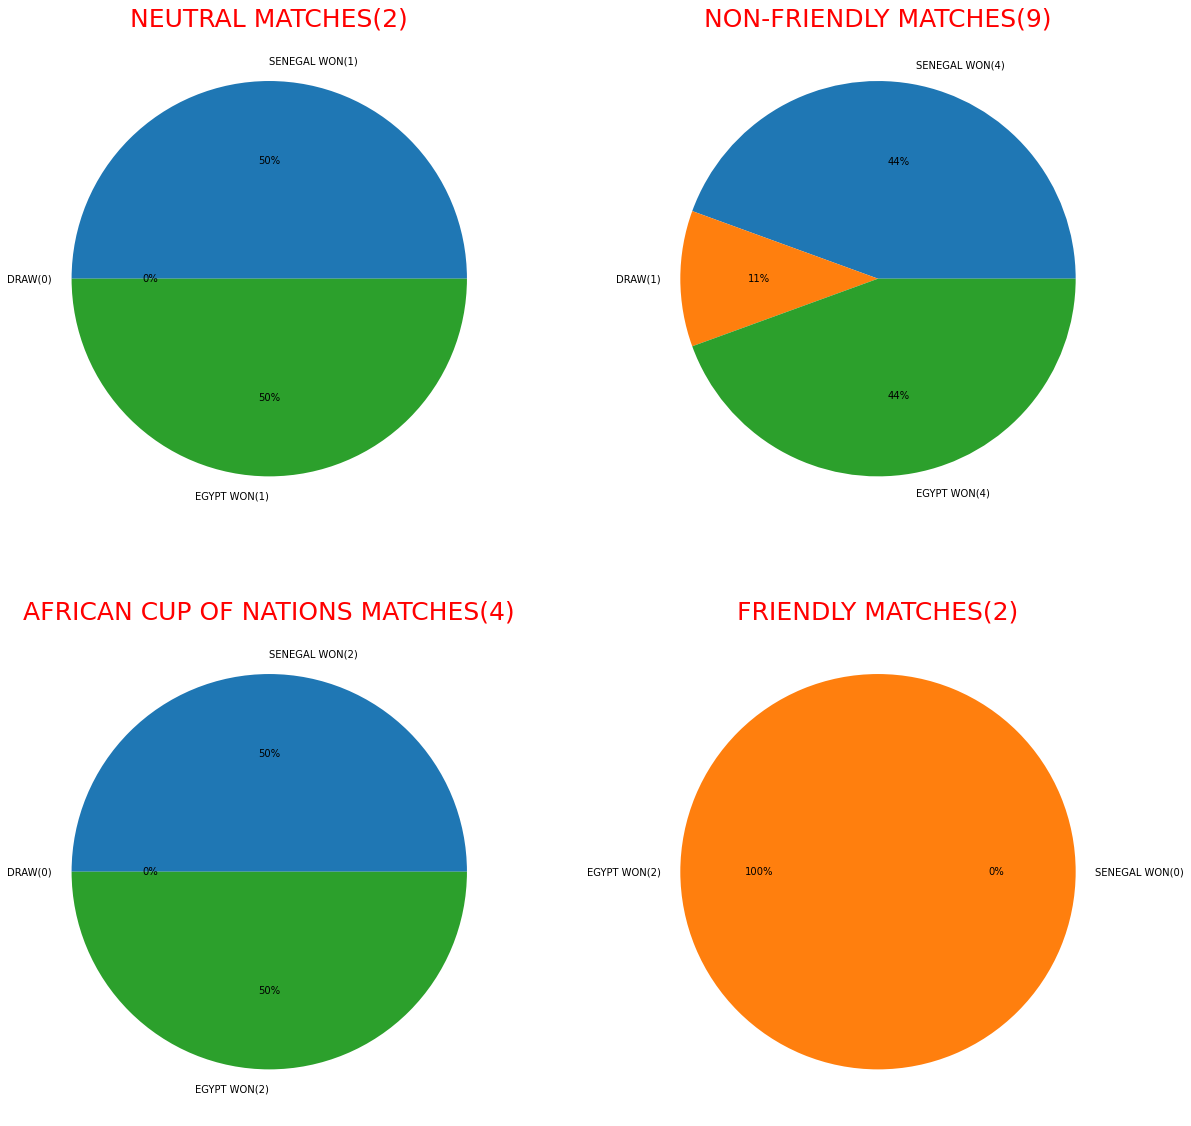

In [19]:
labels1 = [f'SENEGAL WON({neu[0]})', f'DRAW({neu[1]})', f'EGYPT WON({neu[2]})']
sizes1 = get_results(neutral, 'Senegal', 'Egypt')

labels2 = [f'SENEGAL WON({not_frnd[0]})', f'DRAW({not_frnd[1]})', f'EGYPT WON({not_frnd[2]})']
sizes2 = get_results(not_friendly, 'Senegal', 'Egypt')

labels3 = [f'SENEGAL WON({can[0]})', f'DRAW({can[1]})', f'EGYPT WON({can[2]})']
sizes3 = get_results(afcon, 'Senegal', 'Egypt')

labels4 = [f'SENEGAL WON({frnd[0]})', f'EGYPT WON({frnd[2]})']
sizes4 = [0,2]

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows=2, ncols=2 , figsize=(20,20))

ax1.pie(sizes1, labels=labels1, autopct='%.0f%%')
ax2.pie(sizes2, labels=labels2, autopct='%.0f%%')
ax3.pie(sizes3, labels=labels3, autopct='%.0f%%')
ax4.pie(sizes4, labels=labels4, autopct='%.0f%%')


ax1.set_title(f'NEUTRAL MATCHES({sum(neu)})', color='r', fontsize=25)
ax2.set_title(f'NON-FRIENDLY MATCHES({sum(not_frnd)})', color='r', fontsize=25)
ax3.set_title(f'AFRICAN CUP OF NATIONS MATCHES({sum(can)})', color='r', fontsize=25)
ax4.set_title(f'FRIENDLY MATCHES({sum(frnd)})', color='r', fontsize=25)



#plt.show()
plt.savefig("images/senegal_egypt_final1.png")

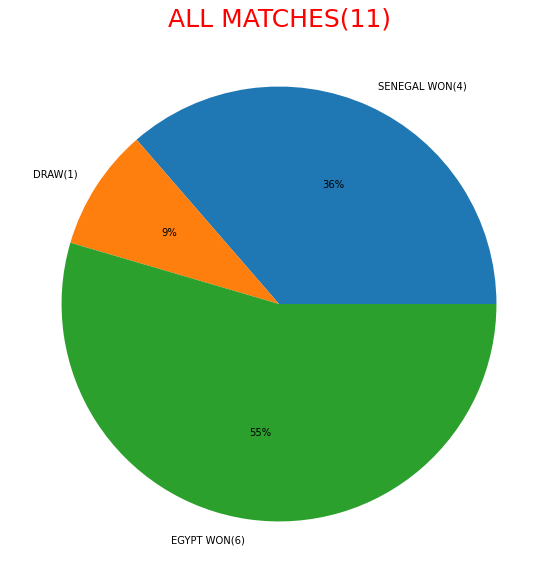

In [21]:
labels = [f'SENEGAL WON({all_match[0]})', f'DRAW({all_match[1]})', f'EGYPT WON({all_match[2]})']
sizes = get_results(sen_egy, 'Senegal', 'Egypt')

fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, labels=labels, autopct='%.0f%%')
ax1.set_title(f'ALL MATCHES({sum(all_match)})', color='r', fontsize=25)


#plt.show()
plt.savefig("images/senegal_egypt_final2.png")